In [1]:
pip install tweet-preprocessor

In [2]:
import tweepy
from textblob import  TextBlob
from preprocessor.api import clean
import statistics
from typing import List
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='darkgrid')
import numpy as np


In [3]:
consumer_key= ""
consumer_secret=""

In [4]:
# Authenticate to Twitter
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)

In [5]:
# retrieving the tweets according to the keyword using tweepy
def get_tweets(keyword):
    all_tweets=[]
    for tweet in tweepy.Cursor(api.search, q=keyword,tweet_mode='extended', lang='en' ).items(100):
        all_tweets.append(tweet.full_text)
    return all_tweets

In [6]:
# Here cleans the retrieved tweets using preprocessor
def clean_tweets(all_tweets):
    tweets_clean=[]
    for tweet in all_tweets:
        tweets_clean.append(clean(tweet))
    return tweets_clean

In [7]:
# Here finding a sentiment score of  all tweets
def get_sentiments(all_tweets):
    sentiment_score=[]
    for tweet in  all_tweets:
        blob=TextBlob(tweet)
        sentiment_score.append(blob.sentiment.polarity)
    return sentiment_score

In [8]:
#for create plot 
def create_plot(first_score, avg, keyword):
    plt.title(keyword)
    plt.plot(first_score)
    plt.axhline(avg, color='orange', linestyle='dashed', label=f'''AVG {np.round(avg, 2)}''')#horizontal line for show avg
    plt.legend(loc='upper right')
    plt.show()

In [9]:
# Here generating a sentiment socre and calculates the mean
def generate_sent_score(keyword):
    tweets=get_tweets(keyword)
    tweets_clean=clean_tweets(tweets)
    sentiment_scores=get_sentiments(tweets_clean)
    average_score=statistics.mean(sentiment_scores)
    create_plot(sentiment_scores, average_score, keyword) #call function for create plot(graph)
    return average_score

Who win
rohit sharma
..or..
virat kohli


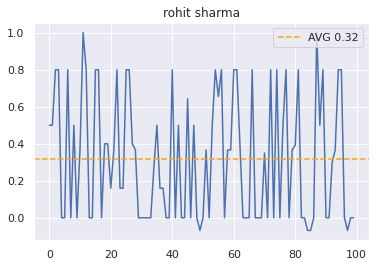

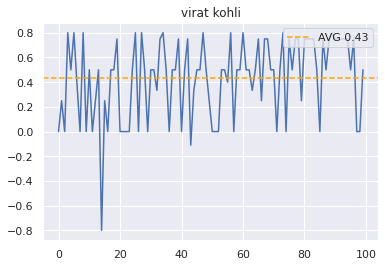

 prefers virat kohli(0.43173333333333336) over rohit sharma(0.3177549603174603)


In [10]:
if __name__=="__main__":
    print("Who win")
    first_thing=input()
    print("..or..")
    second_thing=input()
    first_score = generate_sent_score(first_thing)
    sec_score = generate_sent_score(second_thing)
    
    if(first_score>sec_score):
        print(f" prefers {first_thing}({first_score}) over {second_thing}({sec_score})")
    else:
        print(f" prefers {second_thing}({sec_score}) over {first_thing}({first_score})")

In [11]:
# for particular keywoed retrieving the tweets
for t in tweepy.Cursor(api.search, q="virat kohli",tweet_mode='extended', lang='en' ).items(10):
    print(t.full_text)

RT @Shah_151: Fav Actor : Allu arjun
Fav Cricketer  :  Virat Kohli
Fav Actress : Nidhi agarwal
Fav Food : pav - bhaji
Fav Place : Home
Fav…
RT @ViratkohliFabb2: @imVkohli @FIAFormulaE @one8world Sumit nagal in 2019 :- "Virat Kohli’s foundation has been supporting me since 2017.…
RT @Shruti4518: Virat Kohli - THE MEME

A Thread https://t.co/omgGMyP2JD
RT @Cricketracker: Indian players to win player of the series in all three formats:
Virat Kohli
Rohit Sharma
Bhuvneshwar Kumar

#Cricket #C…
RT @KunwarP45: 1)ODI 💯 in SENA :Rohit(14), Virat(9)
2) T20I 50s in SENA: Rohit(15), Virat (7)
3) icc tournament 💯 in SENA :Rohit (7) , Vira…
RT @Cricketracker: Indian players to win player of the series in all three formats:
Virat Kohli
Rohit Sharma
Bhuvneshwar Kumar

#Cricket #C…
Virat Kohli is great player but, not good captain ,Ajinkya Rahane is good captain
RT @aviralisthebest: Virat Kohli × Steve Smith 

(A thread)
RT @Cricketracker: Indian players to win player of the series in all three formats